<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [162]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [163]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [164]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [165]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [166]:
# Answer:
print(movies.duration.sort_values().head(1))
print(movies.duration.sort_values().tail(1))

389    64
Name: duration, dtype: int64
476    242
Name: duration, dtype: int64


#### Create a histogram of duration, choosing an "appropriate" number of bins.

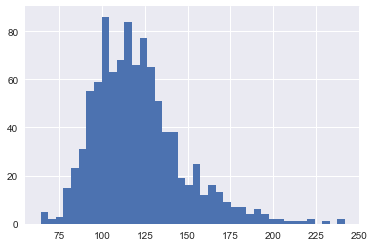

In [167]:
# Answer:

ax = movies.duration.hist(bins=40)

#### Use a box plot to display that same data.

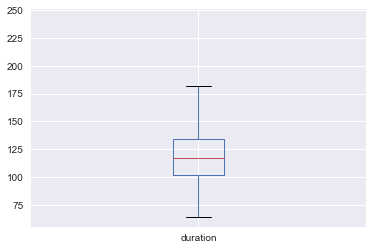

In [168]:
# Answer:

ax = movies.duration.plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [169]:
# Answer:

movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

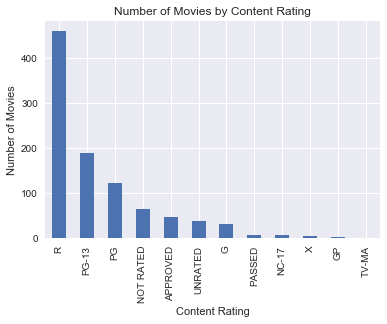

In [170]:
# Answer:

ax = movies.content_rating.value_counts().plot(kind='bar')
ax.set_title('Number of Movies by Content Rating')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Number of Movies')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [171]:
# Answer:

movies['content_rating'].replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)

#confirming the change was made
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [172]:
# Answer:

movies['content_rating'].replace(['X', 'TV-MA'], 'NC-17', inplace=True)

#confirming the change was made
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [173]:
# Answer:

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [174]:
# Answer:

#view the missing values
print(movies.loc[movies.content_rating.isnull(), :])

#fill them in, chose 'UNRATED' as they don't have ratings
movies.content_rating.fillna(value='UNRATED', inplace=True)

#confirm the missing values were filled in
movies.isnull().sum()


     star_rating                               title content_rating  \
187          8.2  Butch Cassidy and the Sundance Kid            NaN   
649          7.7                   Where Eagles Dare            NaN   
936          7.4                           True Grit            NaN   

         genre  duration                                        actors_list  
187  Biography       110  [u'Paul Newman', u'Robert Redford', u'Katharin...  
649     Action       158  [u'Richard Burton', u'Clint Eastwood', u'Mary ...  
936  Adventure       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']  


star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [175]:
# Answer:

#movies longer than 2 hours (aka 120 minutes)
print(movies.loc[movies.duration > 120, 'star_rating'].mean())

#movies shorter than 2 hours
print(movies.loc[movies.duration < 120, 'star_rating'].mean())


7.953669724770622
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [176]:
# Answer:

movies.corr()

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


#### Calculate the average duration for each genre.

In [177]:
# Answer:

movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

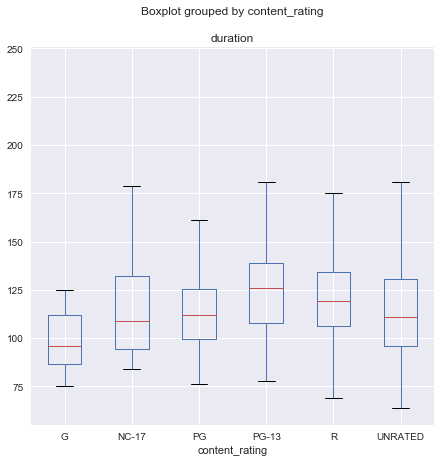

In [178]:
# Answer:

ax = movies.boxplot(column='duration', by='content_rating', figsize=(7,7))

#### Determine the top rated movie (by star rating) for each genre.

In [179]:
# Answer:

movies.groupby('genre')['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [116]:
# Answer:

#use value_counts to find out if there are any movies with the same title
#only printed the head since there weren't many with the same title & value_counts() sorts
print(movies.title.value_counts().head())

#set the index to the title column so I could only pull the rows of data with the titles in question
movies.set_index('title', inplace=True)
movies.loc[['True Grit', 'Les Miserables','Dracula','The Girl with the Dragon Tattoo']]

#quick visual inspection shows the rows are not duplicates as values in the other columns are different

True Grit                          2
Les Miserables                     2
Dracula                            2
The Girl with the Dragon Tattoo    2
Control                            1
Name: title, dtype: int64


,star_rating,content_rating,genre,duration,actors_list
title,,,,,
True Grit,7.7,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
True Grit,7.4,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
Les Miserables,7.7,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
Les Miserables,7.5,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
Dracula,7.6,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
Dracula,7.5,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
The Girl with the Dragon Tattoo,7.9,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
The Girl with the Dragon Tattoo,7.8,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [159]:
# Answer:

print(movies.genre.value_counts())

big_genres = ['Drama', 'Comedy', 'Action']

movies.set_index('genre', inplace=True)
movies.groupby('genre').loc[big_genres, 'star_rating'].mean()


Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64


AttributeError: Cannot access callable attribute 'loc' of 'DataFrameGroupBy' objects, try using the 'apply' method

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [61]:
# Answer:

larger_genres = []

if movies.genre.value_counts() > 10:
    larger_genres.append(genre)

print(larger_genres)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [52]:
# Answer:

movies.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [24]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [183]:
movies.actors_list.describe()
#there are 10 instances where the actors list is not unique
#and this cannot be explained by the duplicate titles we discovered above

count                                                   979
unique                                                  969
top       [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
freq                                                      6
Name: actors_list, dtype: object